# Computational Intelligence
# Lecture 2: Optimization Basics

- Create a function
- Evaluate a function with a set of points
- Plot a function using matplotlib
- Computational approach
 - Exhaustive search
 - Local search (LS)
 - Iterated local search (ILS)
 - Simulated annealing (SA)

## Create a function
- Define a function $f()$ using the 'def' keyword
- Accept an input $x$ as an argument
- Return an output $y = f(x)$

In [30]:
# Create a mathematical function as function (def)
def f1(x):
    return 15 * x - x * x

print("f1(0) =", f1(0))
print("f1(10) =", f1(10))
print("f1(100) =", f1(100))

f1(0) = 0
f1(10) = 50
f1(100) = -8500


## Evaluate a function with a set of points
- Import a package named 'numpy'
- Create a list of values $x$
- Evaluate a function $f()$ with the list $x$

In [29]:
import numpy as np

# Create a list of containing: 0, 1, 2, 3, 4
x = np.arange(0, 5, 1) 
print("x =", x)

def f(x):
    return 15 * x - x * x

# Evaluate the function by just passing x into f
y = f(x)
print("y =", y)

x =  [0 1 2 3 4]
y =  [ 0 14 26 36 44]


## Plot a function using matplotlib
- Import a package named 'matplotlib'
- Create a list of values $x$
- Evaluate a function $f()$ at all points $x$
- Plot a graph of $f()$ against $x$
- Display the graph

[0, 4, 0, 50]

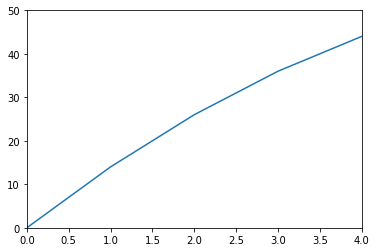

In [18]:
import matplotlib.pyplot as plt

plt.plot(x, y)plt.plot(x, y)

Text(0.5,1,'$f(x)=15x - x^2$')

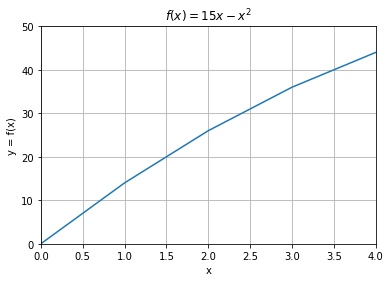

In [24]:
plt.plot(x, y)

# Formatting the plot
plt.axis([0, 4, 0, 50]) #specify the range of the horizontal and vertical axes
plt.xlabel("x") #add axis name
plt.ylabel("y = f(x)") #add axis name
plt.grid(True) #show grid
plt.title(r"$f(x)=15x - x^2$") #add title. r"" means raw string (LaTex code can be used).

## Create and plot a function of two variables
- Create a list of values $x_0$
- Create a list of values $x_1$
- Create a grid of $x_0$ and $x_1$ using 'np.meshgrid'
- Evaluate a function $f()$
- Plot the function using 'plt.plot_surface'

Text(0.5,0.92,'Ackley function')

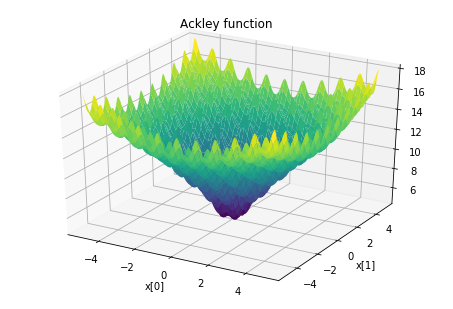

In [55]:
# Define functions
def sphere(x):
    return x[0] * x[0] + x[1] * x[1]

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1]))) + \
            np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20 

# Create a list of values $x$
# Create a list of values $y$
step = 0.01
x0 = np.arange(-5, 5, step)
x1 = np.arange(-5, 5, step)

# Create a grid of $x$ and $y$ using 'np.meshgrid'
x0, x1 = np.meshgrid(x0, x1)

# Evaluate a function $f(x,y)$
y = ackley([x0, x1])

# Plot the function using 'plt.plot_surface'
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)

# Formatting the plot
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")
ax.set_title("Ackley function")       

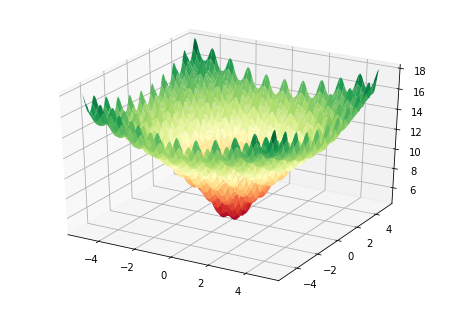

In [54]:
# Changing the color map: cmap
# See: https://matplotlib.org/examples/color/colormaps_reference.html

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0, x1, y, cmap = cm.RdYlGn, antialiased = True)

## Computational approach
 - Exhaustive search
 - Local search (LS)
 - Iterated local search (ILS)
 - Simulated annealing (SA)
 - Tabu search (TS)

## Exhaustive search
- Implementing exhaustive search with numpy is very simple
- No loop is required as numpy can evaluate a function $f()$ with a list of values
- Also provide functions to find maximum ('np.max') and minimum ('np.min')

Maximum value of f(x*) = 56.25
Optimal solution x* = 7.5


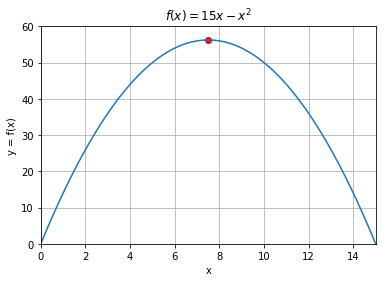

In [82]:
# Create a function
def f(x):
    return 15 * x - x * x

# Create a list of all values and evaluate the function
step = 0.0001
x = np.arange(0, 15, step) 
y = f(x)

# Finding the maximum
y_best = np.max(y)
x_best = x[np.argmax(y)]
print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)

# Plot a graph
ax = plt.plot(x, y)
plt.axis([0, 15, 0, 60])
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title(r"$f(x)=15x - x^2$")
plt.grid(True)
plt.scatter(x_best, y_best, color='red')

## Local search (LS)
- $t= 0$
- Find a starting point $\mathbf{x}(t) \in S$ 
- Repeat
 - Evaluate $f(\mathbf{x}(t))$
 - Calculate a search direction $\mathbf{q}(t)$
 - Calculate a step size $\eta(t)$
 - $\mathbf{x}(t+1) \leftarrow \mathbf{x}(t) + \eta(t)\mathbf{q}(t)$
 - $t \leftarrow t + 1$
- Until stopping condition is true
- Return $\mathbf{x}(t)$ as the solution

In [122]:
# Create a mathematical function as function (def)
def f(x):
    return 15 * x - x * x

# Derivative of f(x)
def f_derivative(x):
    return 15 - 2 * x

# Local search (LS)
def LS(f, f_derivative, S, step_size=0.1, t_max=100):
    t = 0
    # Find starting point
    x = np.random.uniform(low=S[0], high=S[1])
    print(x)
    # Looping
    while t < t_max:
        y = f(x)
        print("t =", t, ": f(", x, ") =", y)
        q = f_derivative(x)
        x = x + step_size * q
        t += 1
    return x, f(x)

x_best, y_best = LS(f, f_derivative, S=[0, 15], step_size=0.1)

print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)

13.530041984693867
t = 0 : f( 13.530041984693867 ) = 19.888593662829265
t = 1 : f( 12.324033587755093 ) = 32.978699944210746
t = 2 : f( 11.359226870204074 ) = 41.35636796429486
t = 3 : f( 10.587381496163259 ) = 46.71807549714872
t = 4 : f( 9.969905196930608 ) = 50.149568318175184
t = 5 : f( 9.475924157544487 ) = 52.34572372363212
t = 6 : f( 9.080739326035589 ) = 53.751263183124536
t = 7 : f( 8.764591460828472 ) = 54.6508084371997
t = 8 : f( 8.511673168662778 ) = 55.226517399807804
t = 9 : f( 8.309338534930223 ) = 55.594971135877
t = 10 : f( 8.14747082794418 ) = 55.83078152696129
t = 11 : f( 8.017976662355343 ) = 55.98170017725522
t = 12 : f( 7.914381329884274 ) = 56.078288113443335
t = 13 : f( 7.83150506390742 ) = 56.140104392603746
t = 14 : f( 7.765204051125936 ) = 56.179666811266394
t = 15 : f( 7.712163240900749 ) = 56.20498675921049
t = 16 : f( 7.669730592720599 ) = 56.22119152589472
t = 17 : f( 7.6357844741764795 ) = 56.23156257657262
t = 18 : f( 7.608627579341183 ) = 56.2382000490

## Multimodal problem (many optimum)

Maximum value of f(x*) = 1.9884881541249217
Optimal solution x* = 0.32600000000000073


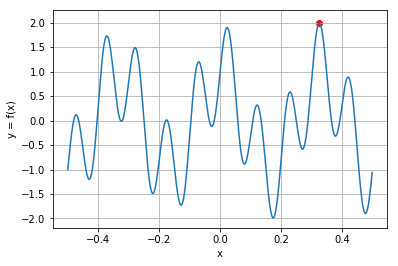

In [134]:
# Create a function
def f(x):
    return np.sin(20 * np.pi * x) + np.cos(6 * np.pi * x) 

# Create a list of all values and evaluate the function
step = 0.001
x = np.arange(-0.5, 0.5, step) 
y = f(x)

# Finding the maximum
y_best = np.max(y)
x_best = x[np.argmax(y)]
print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)

# Plot a graph
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid(True)
plt.scatter(x_best, y_best, color='red')

-0.19155390105237213
t = 0 : f( -0.19155390105237213 ) = -0.3858460801300463
t = 1 : f( -0.14588567517623588 ) = -1.1798976232159015
t = 2 : f( -0.19943351060619963 ) = -0.7796611038710222
t = 3 : f( -0.14755748022515147 ) = -1.0886927916064961
t = 4 : f( -0.20300712736375692 ) = -0.9622392579335409
t = 5 : f( -0.1532191057004002 ) = -0.7671593522182742
t = 6 : f( -0.2100431129462077 ) = -1.2739290883017442
t = 7 : f( -0.17306252172018613 ) = -0.0001421598952922043
t = 8 : f( -0.18295948457565056 ) = -0.07568027095722774
t = 9 : f( -0.15852863047290885 ) = -0.47766853850909197
t = 10 : f( -0.20967285886264567 ) = -1.2600622287372778
t = 11 : f( -0.17175339360754538 ) = -0.016140761445165408
t = 12 : f( -0.1862863511558091 ) = -0.17347093817599035
t = 13 : f( -0.15218447654201397 ) = -0.826146828171324
t = 14 : f( -0.20934348293852434 ) = -1.247438092766848
t = 15 : f( -0.17061168888615233 ) = -0.03500854908635531
t = 16 : f( -0.18911776421633114 ) = -0.28007691919087263
t = 17 : f( -0.

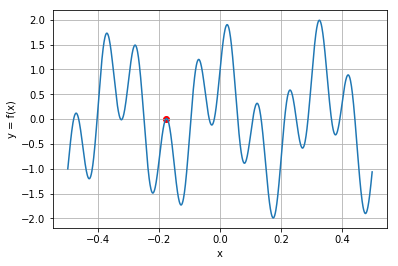

In [149]:
# Create a function
def f_derivative(x):
    return (np.cos(20 * np.pi * x) * 20 * np.pi) + \
            (-np.sin(6 * np.pi * x) * 6 * np.pi)
    
x_best, y_best = LS(f, f_derivative, S=[-0.5, 0.5], step_size=0.001, t_max=100)

print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)


# Plot a graph
step = 0.001
x = np.arange(-0.5, 0.5, step) 
y = f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid(True)
plt.scatter(x_best, y_best, color='red')

## Local search (LS) with animation

0.22015281290399047


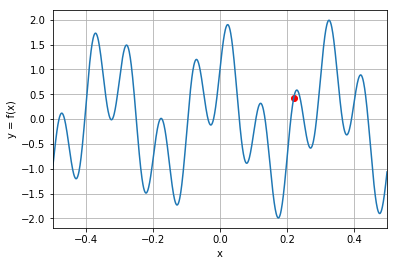

t = 0 : f( 0.22015281290399047 ) = 0.4205871381672228


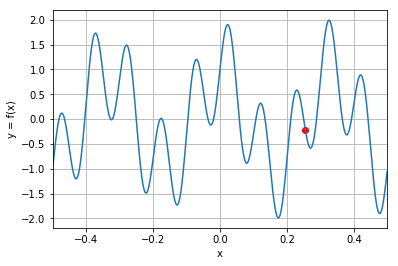

t = 1 : f( 0.25493851591671196 ) = -0.2123861690387279


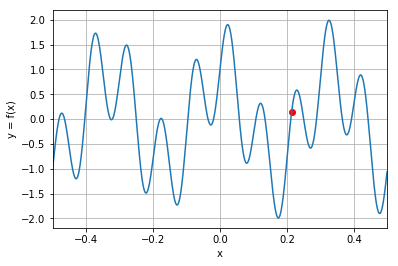

t = 2 : f( 0.21387525537151295 ) = 0.13597345224004154


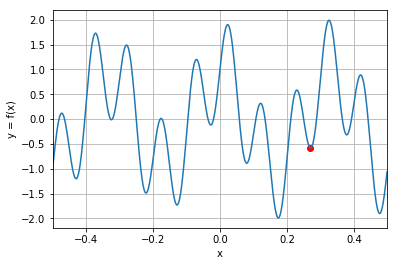

t = 3 : f( 0.2689498152887628 ) = -0.5789628706328955


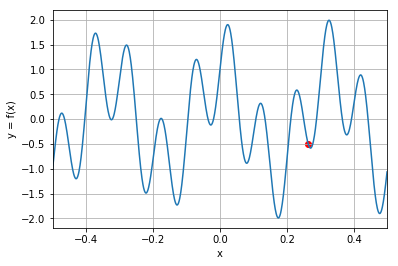

t = 4 : f( 0.26329556616160665 ) = -0.4935546048937183


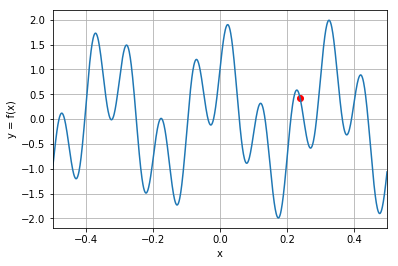

t = 5 : f( 0.23940286165505817 ) = 0.41929259310770717


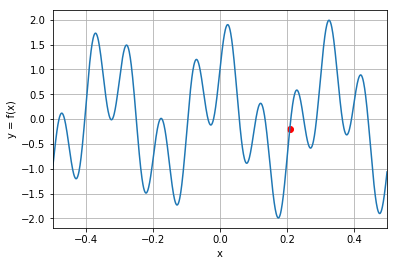

t = 6 : f( 0.2084666733698319 ) = -0.19808937737935395


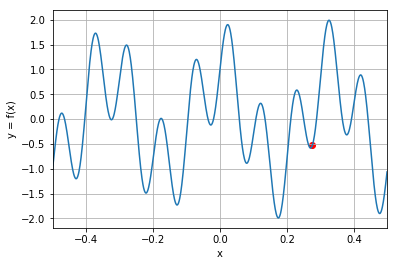

t = 7 : f( 0.27597765193317597 ) = -0.5277816888579187


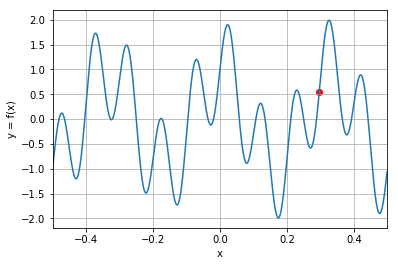

t = 8 : f( 0.29646937414578317 ) = 0.5481166464343815


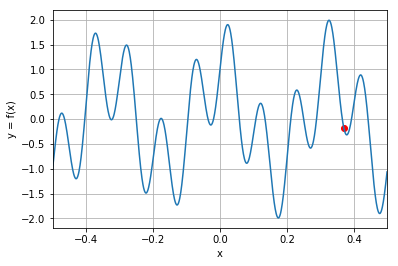

t = 9 : f( 0.36983063266802196 ) = -0.17516998464483846


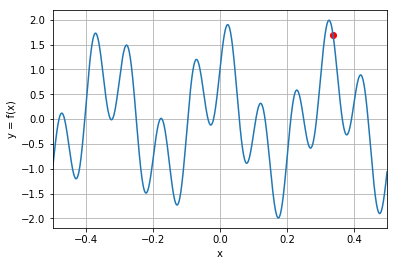

t = 10 : f( 0.33781099291310057 ) = 1.689595893311546


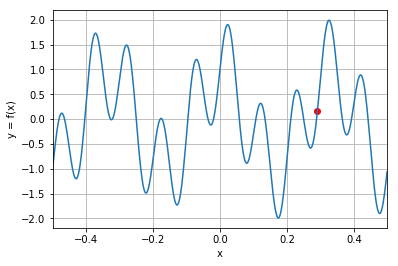

t = 11 : f( 0.29093349951526193 ) = 0.15791743723854235


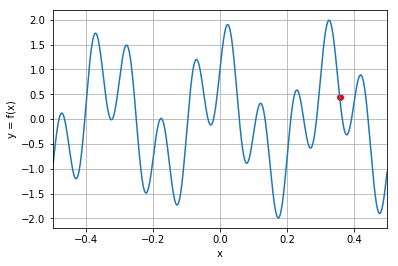

t = 12 : f( 0.35735462298673104 ) = 0.45339681805264676


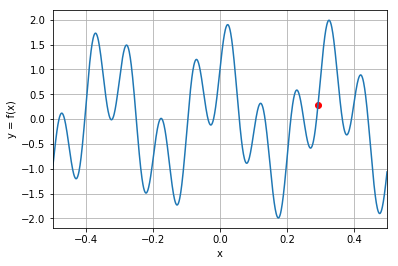

t = 13 : f( 0.2928665735641729 ) = 0.28956790395186977


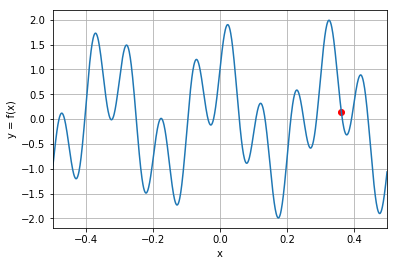

t = 14 : f( 0.36251606296609906 ) = 0.1446618435642102


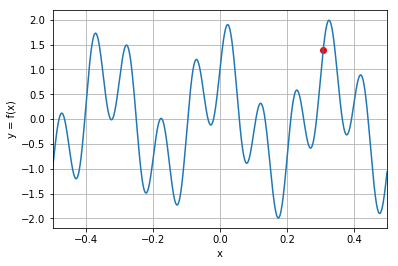

t = 15 : f( 0.3082783650026887 ) = 1.3875416315818812


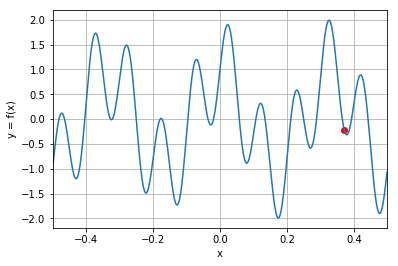

t = 16 : f( 0.37137544088846763 ) = -0.2204496363314965


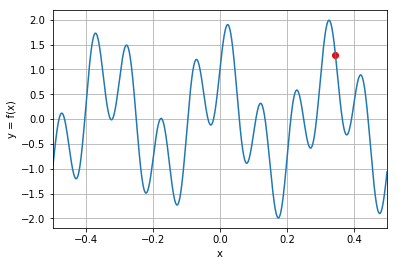

t = 17 : f( 0.3448019940572163 ) = 1.2975490890009138


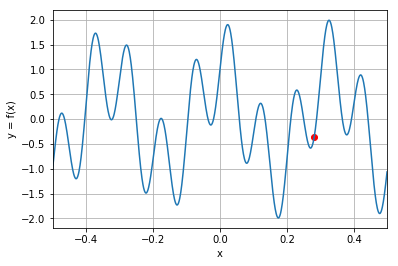

t = 18 : f( 0.2812483100257314 ) = -0.3683764161893215


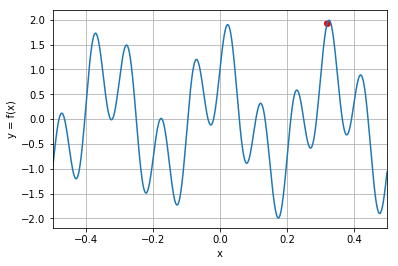

t = 19 : f( 0.3209600217339442 ) = 1.9408800393596035


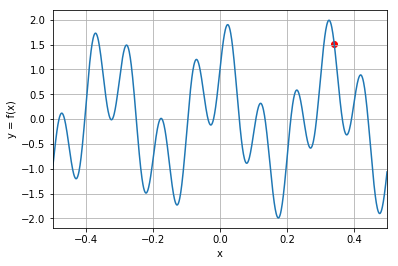

t = 20 : f( 0.34109504767631016 ) = 1.5200914450921588


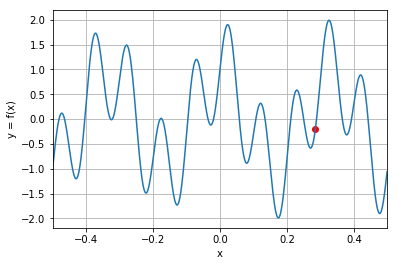

t = 21 : f( 0.28509629285482724 ) = -0.19110572022827388


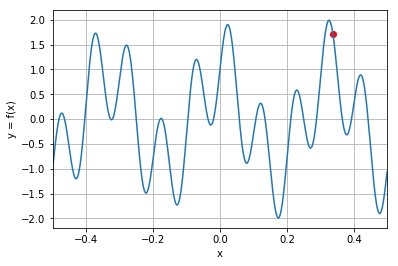

t = 22 : f( 0.3372078755332105 ) = 1.717299939702736


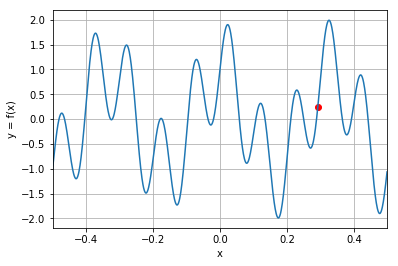

t = 23 : f( 0.292226539220014 ) = 0.2452975608917658


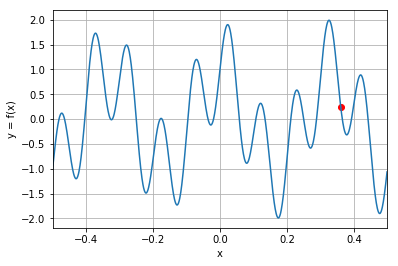

t = 24 : f( 0.3608990190476731 ) = 0.23549497417225373


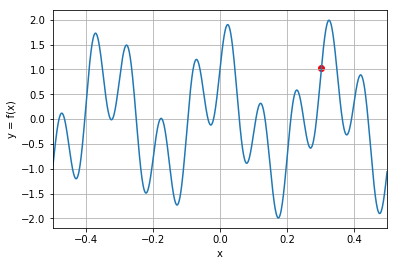

t = 25 : f( 0.30287366565740614 ) = 1.019231874954268


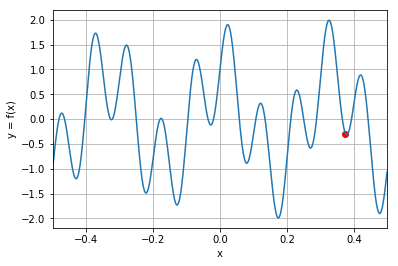

t = 26 : f( 0.3749217186228418 ) = -0.2918385078889918


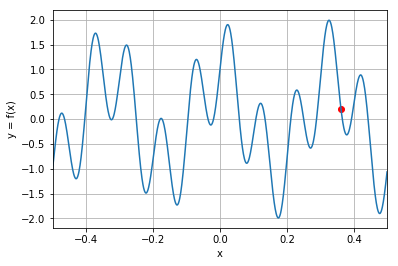

t = 27 : f( 0.36130371041137216 ) = 0.2121939890472656


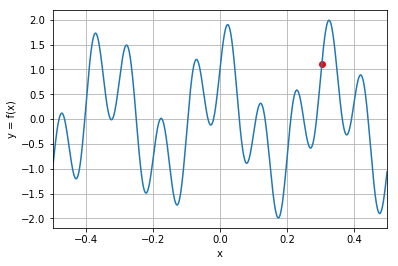

t = 28 : f( 0.3041799961451875 ) = 1.1123993500979703


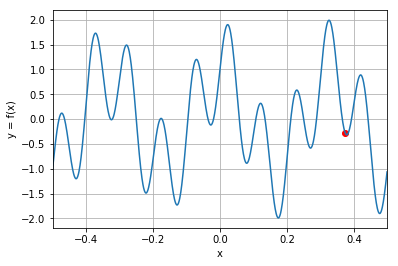

t = 29 : f( 0.3747020921728033 ) = -0.2887585009291401


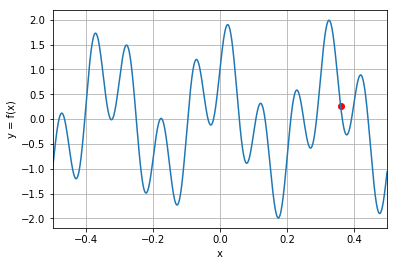

t = 30 : f( 0.36027247492391146 ) = 0.27227193714804754


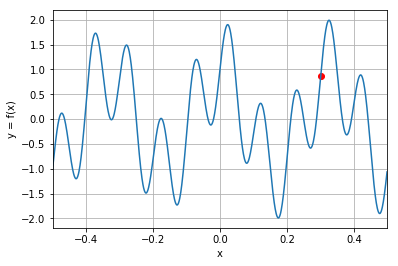

t = 31 : f( 0.3009145701905883 ) = 0.876461770570575


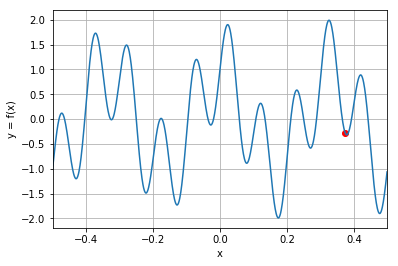

t = 32 : f( 0.37445767836013916 ) = -0.2851213768697446


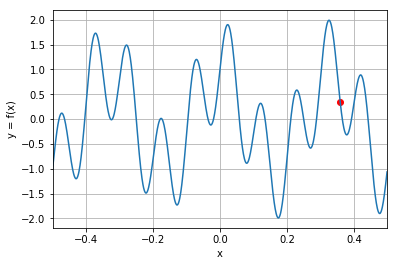

t = 33 : f( 0.35912539027644425 ) = 0.3416672943325889


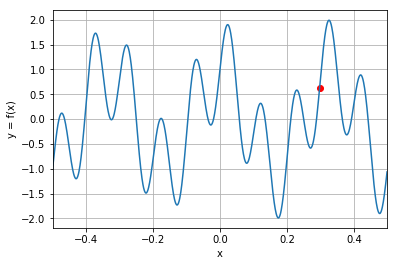

t = 34 : f( 0.2975342858570661 ) = 0.626527939807134


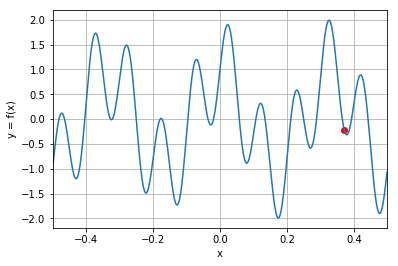

t = 35 : f( 0.37138964152801873 ) = -0.2208266354659877


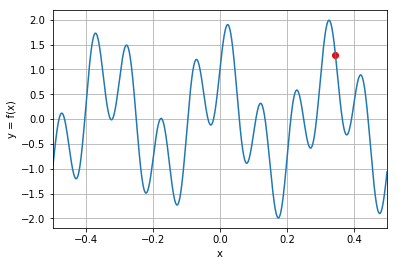

t = 36 : f( 0.3448670121234401 ) = 1.293413551566688


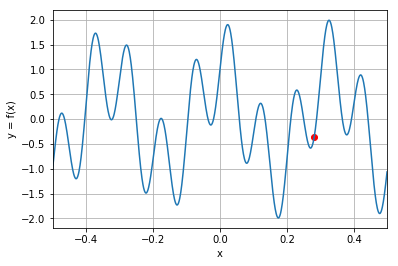

t = 37 : f( 0.28120891467413445 ) = -0.36993819474333833


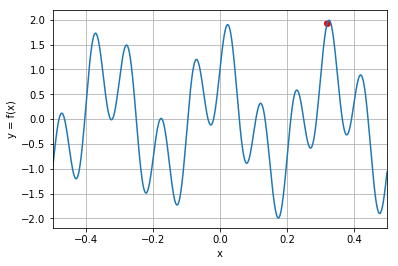

t = 38 : f( 0.32078463055545176 ) = 1.9372844983563398


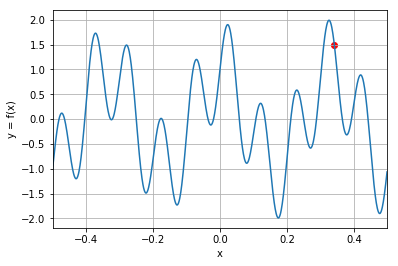

t = 39 : f( 0.34164951956945305 ) = 1.48867160244644


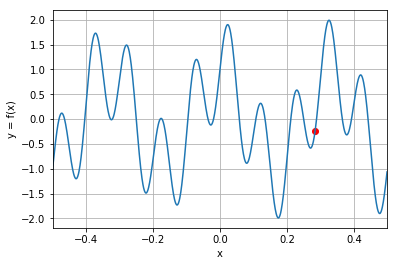

t = 40 : f( 0.28432671464092507 ) = -0.23032130006357787


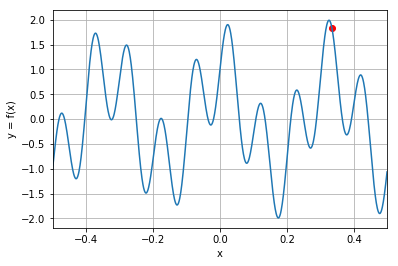

t = 41 : f( 0.33411505296060107 ) = 1.8403238516871143


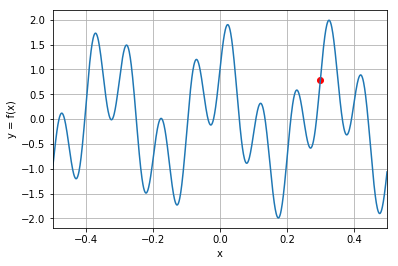

t = 42 : f( 0.2997877031664577 ) = 0.7933197742762605


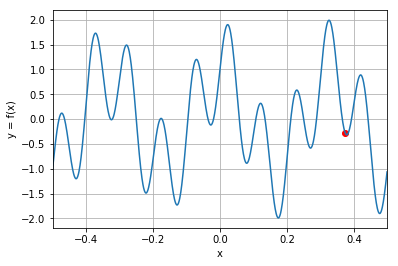

t = 43 : f( 0.3737543930096342 ) = -0.27342633253973314


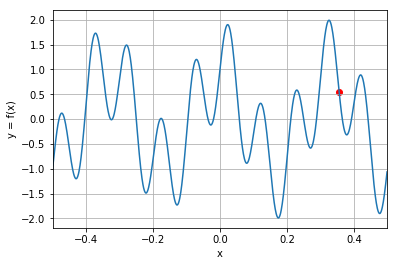

t = 44 : f( 0.35582989356638295 ) = 0.5532637872163335


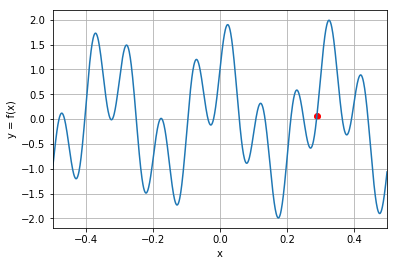

t = 45 : f( 0.2894106912247997 ) = 0.059076218418810056


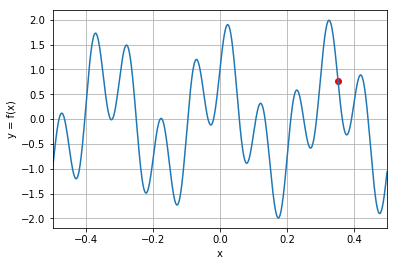

t = 46 : f( 0.35272393545781283 ) = 0.7636280814597385


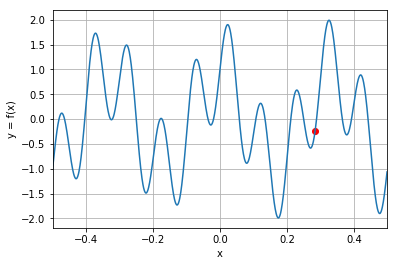

t = 47 : f( 0.28407286936735465 ) = -0.24286037684221096


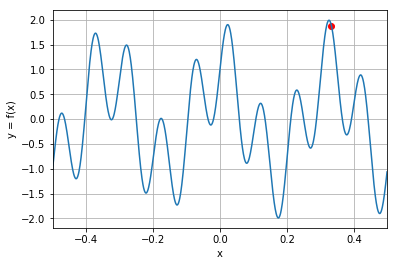

t = 48 : f( 0.3330760867503085 ) = 1.8739818125532735


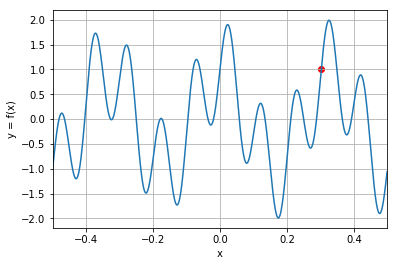

t = 49 : f( 0.3026351347776448 ) = 1.0020180944586445


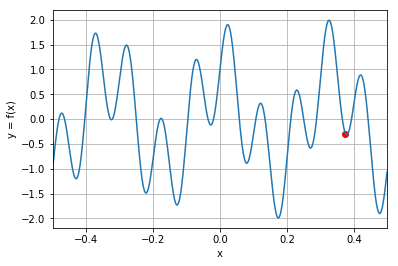

t = 50 : f( 0.37491640335454507 ) = -0.2917660723093859


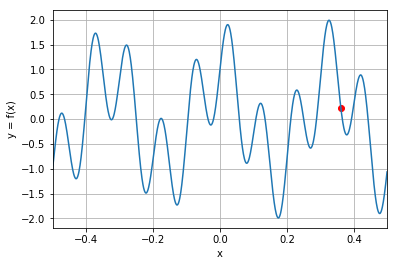

t = 51 : f( 0.3612787490154774 ) = 0.21362058244191728


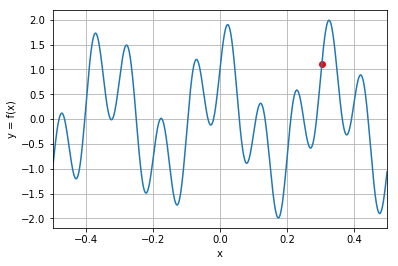

t = 52 : f( 0.304098507494798 ) = 1.106648212488575


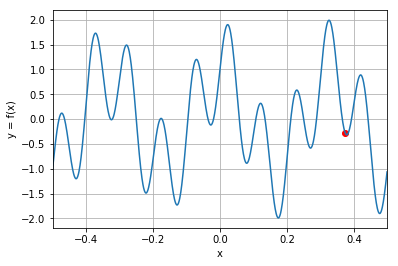

t = 53 : f( 0.37472801024298474 ) = -0.2891312478499569


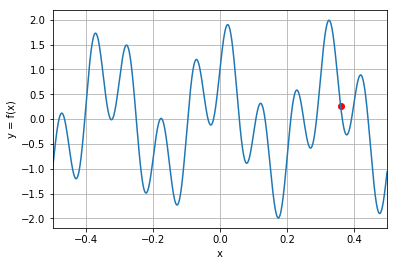

t = 54 : f( 0.36039415050995566 ) = 0.2650648709577449


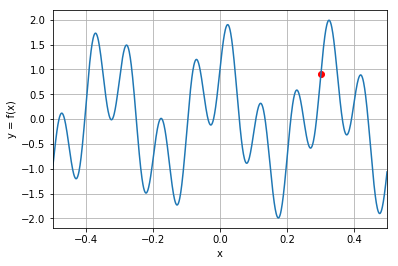

t = 55 : f( 0.30128891444772304 ) = 0.9039537365016853


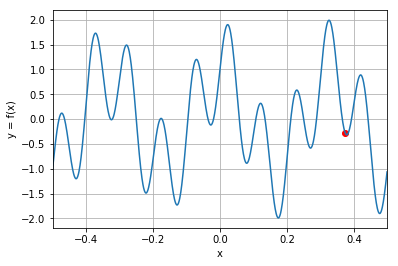

t = 56 : f( 0.3746205983972725 ) = -0.2875703097758857


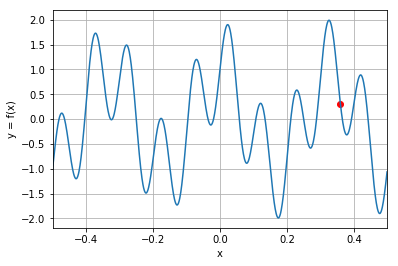

t = 57 : f( 0.35988993450171963 ) = 0.2951278930392772


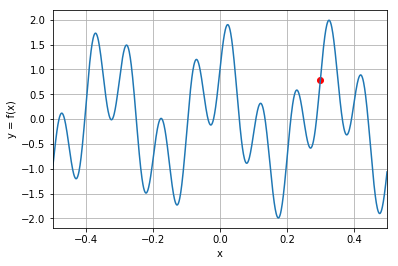

t = 58 : f( 0.2997571563556993 ) = 0.7910602198452326


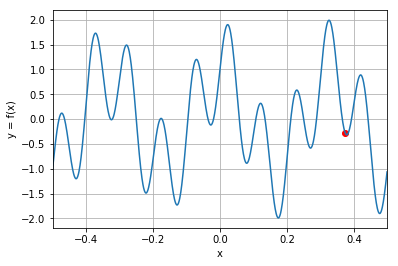

t = 59 : f( 0.3737308751111275 ) = -0.2730037687073986


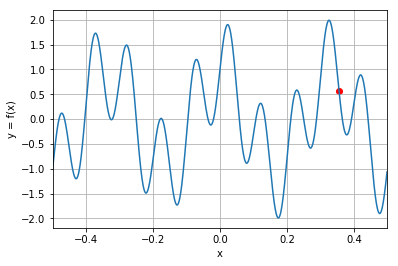

t = 60 : f( 0.3557198673079147 ) = 0.5605781900221831


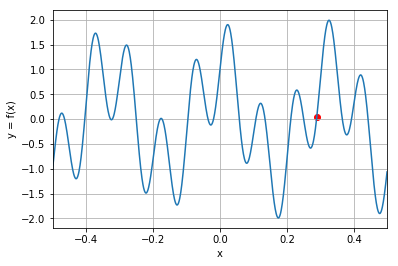

t = 61 : f( 0.28918213986611124 ) = 0.044663663019918864


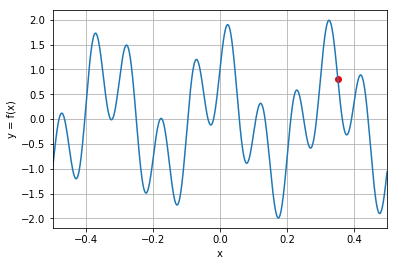

t = 62 : f( 0.3519880972135825 ) = 0.814219937217072


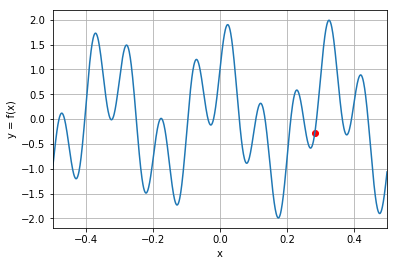

t = 63 : f( 0.28315342419152256 ) = -0.2865836323383876


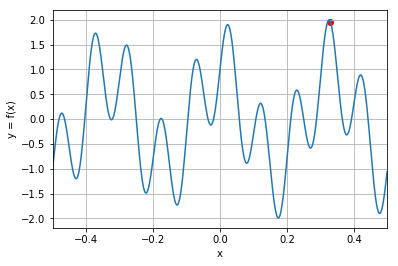

t = 64 : f( 0.32923935585120445 ) = 1.9617575781573442


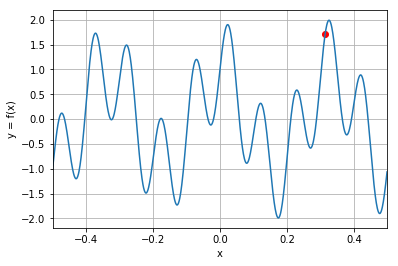

t = 65 : f( 0.31415342938087204 ) = 1.7119780760926797


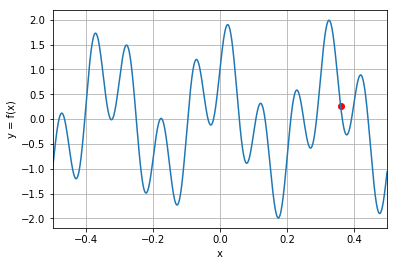

t = 66 : f( 0.36040263797628075 ) = 0.26456329251238775


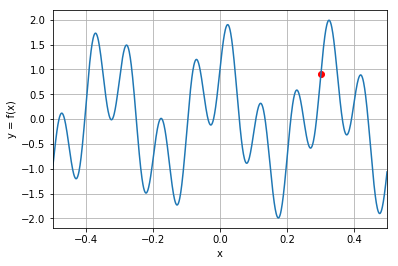

t = 67 : f( 0.30131513760962597 ) = 0.9058765140135424


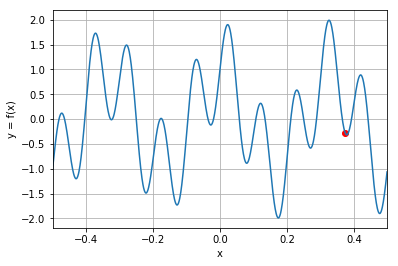

t = 68 : f( 0.374630691835381 ) = -0.2877188046664281


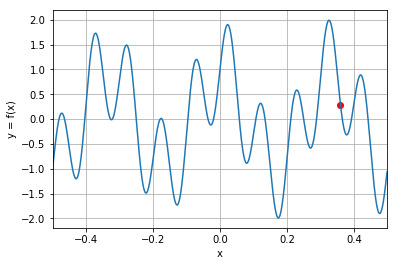

t = 69 : f( 0.35993731051596667 ) = 0.29228127479567456


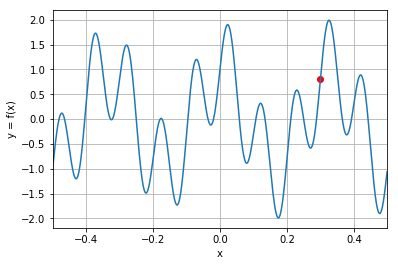

t = 70 : f( 0.29989888071603943 ) = 0.8015417060161176


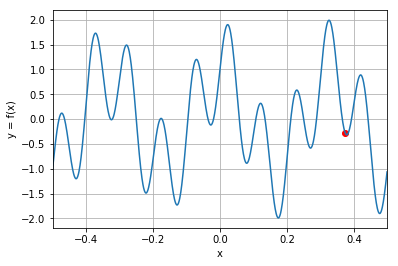

t = 71 : f( 0.3738380030370811 ) = -0.27491213993278074


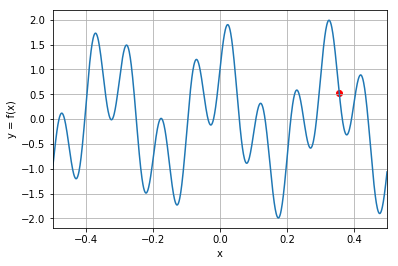

t = 72 : f( 0.35622116132589765 ) = 0.5273618744412611


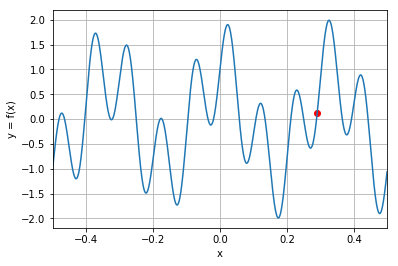

t = 73 : f( 0.2902463812569894 ) = 0.11273390923854787


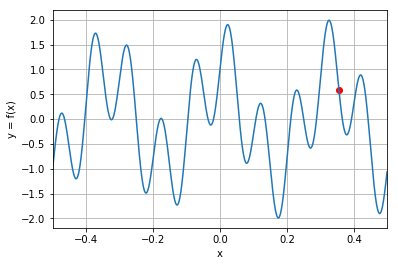

t = 74 : f( 0.35532468933184264 ) = 0.5869531184116439


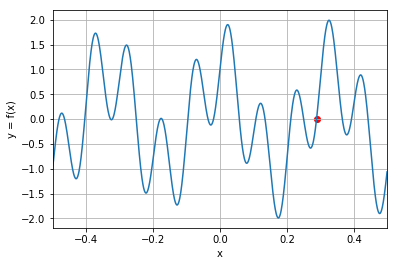

t = 75 : f( 0.2883847617775027 ) = -0.004687045592241201


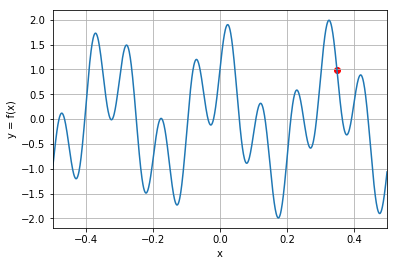

t = 76 : f( 0.349340708626494 ) = 0.9962358928983016


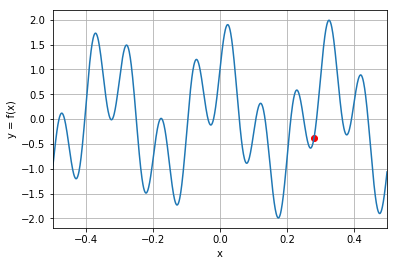

t = 77 : f( 0.28096115317721376 ) = -0.37963726763679395


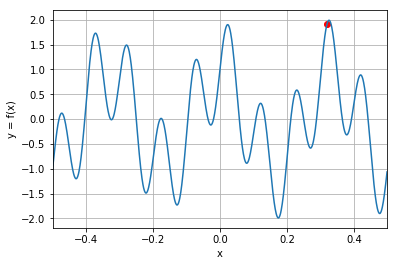

t = 78 : f( 0.3196780586263651 ) = 1.911667697034679


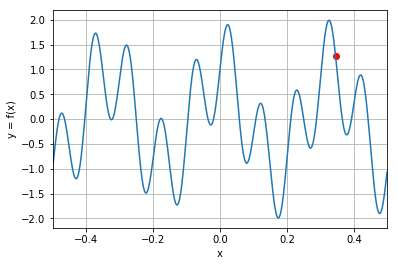

t = 79 : f( 0.3450972829755506 ) = 1.2787130569040683


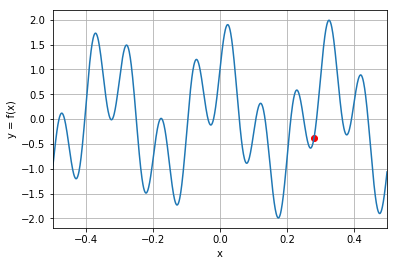

t = 80 : f( 0.2810774472988474 ) = -0.37511122325155277


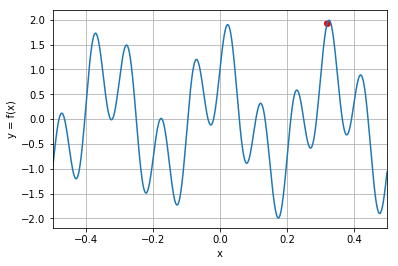

t = 81 : f( 0.3201982104251652 ) = 1.9243366872130638


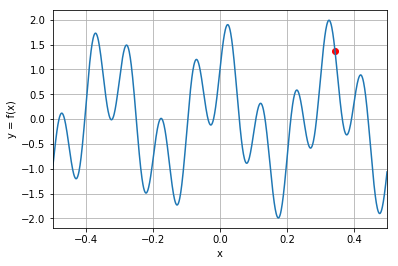

t = 82 : f( 0.34348807800635717 ) = 1.3795717578238025


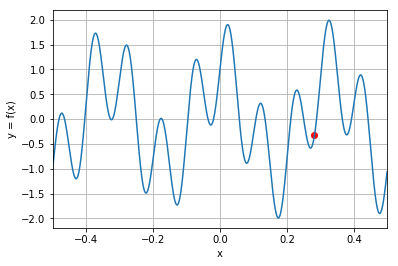

t = 83 : f( 0.28225651534336366 ) = -0.32660315457875344


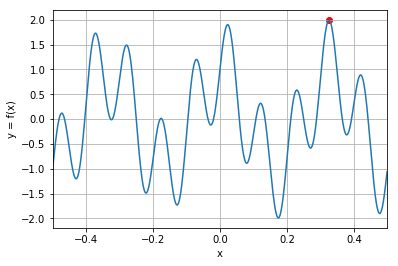

t = 84 : f( 0.325393145783745 ) = 1.9885154055952339


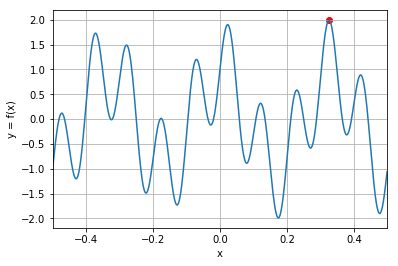

t = 85 : f( 0.3266518995897673 ) = 1.9866982292674682


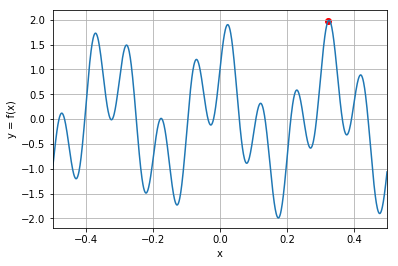

t = 86 : f( 0.3225098452404717 ) = 1.9670453478499228


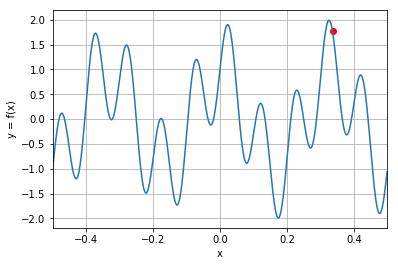

t = 87 : f( 0.3361195467640907 ) = 1.764324840566899


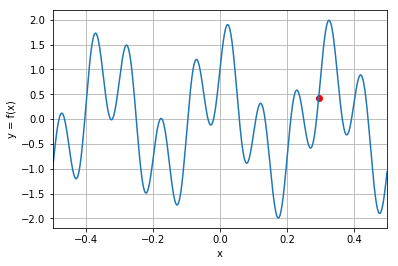

t = 88 : f( 0.2947170018508413 ) = 0.42069444655178156


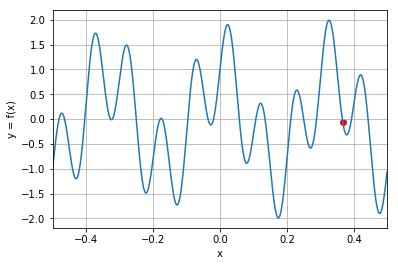

t = 89 : f( 0.366659654770063 ) = -0.05671035896074317


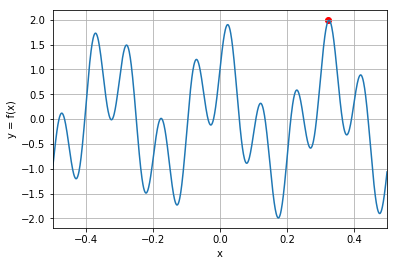

t = 90 : f( 0.32414228276370355 ) = 1.9835783786374699


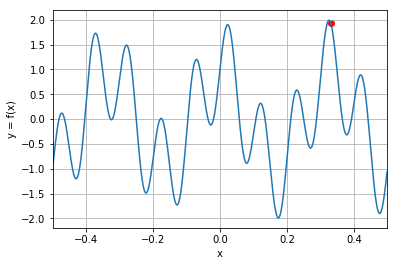

t = 91 : f( 0.3307760974238086 ) = 1.933701635121341


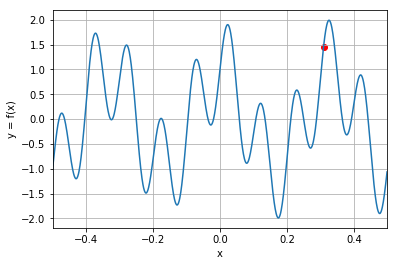

t = 92 : f( 0.30937851931002985 ) = 1.4555313103032916


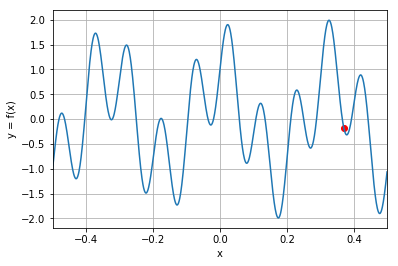

t = 93 : f( 0.36983857092757166 ) = -0.17542405561277308


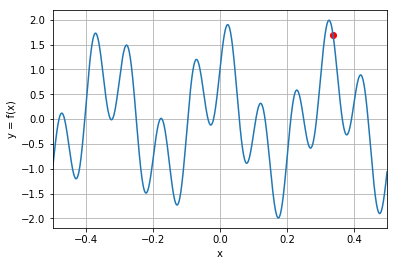

t = 94 : f( 0.33784645524168844 ) = 1.687931566294581


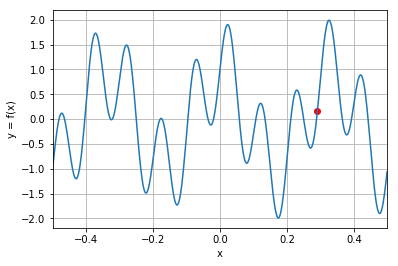

t = 95 : f( 0.29085947803279855 ) = 0.15300601625364185


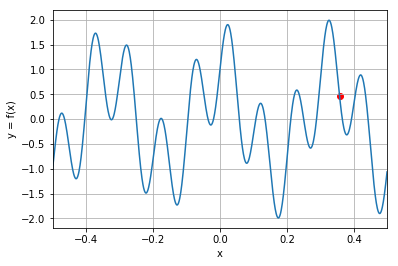

t = 96 : f( 0.3571407433796225 ) = 0.46722207851385


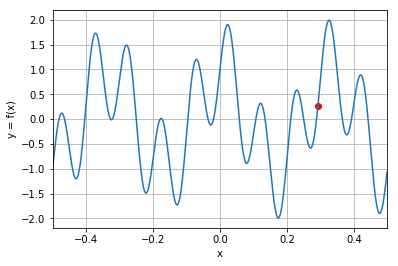

t = 97 : f( 0.2923497405335885 ) = 0.25377016286758064


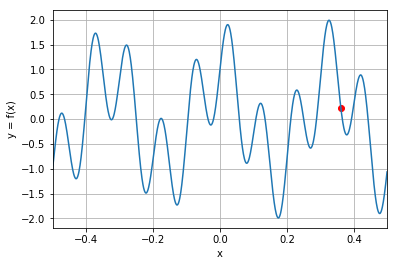

t = 98 : f( 0.36121746698531937 ) = 0.21712894419185236


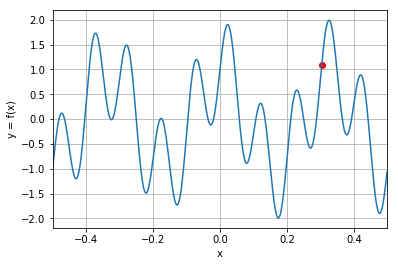

t = 99 : f( 0.303898953861181 ) = 1.0925281149150798
Maximum value of f(x*) = -0.28993719666005113
Optimal solution x* = 0.3747846506529057


In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mathematical function as function (def)
def f1(x):
    return 15 * x - x * x
def f1_derivative(x):
    return 15 - 2 * x
S1 = [0, 15]

# Create a function
def f2(x):
    return np.sin(20 * np.pi * x) + np.cos(6 * np.pi * x) 
def f2_derivative(x):
    return (np.cos(20 * np.pi * x) * 20 * np.pi) + \
            (-np.sin(6 * np.pi * x) * 6 * np.pi)
S2 = [-0.5, 0.5]

def plot(f, S, x_c):
    # Create a list of all values and evaluate the function
    step = 0.001
    x = np.arange(S[0], S[1], step) 
    y = f(x)
    plt.figure(1) #choose figure
    plt.clf() #clear figure
    plt.plot(x,y)
    plt.scatter(x_c, f(x_c), color='red')
    y_max = np.max(y)
    y_min = np.min(y)
    y_range = y_max - y_min
    plt.axis([S[0], S[1], y_min - 0.05 * y_range, np.max(y) + 0.05 * y_range])
    plt.xlabel("x")
    plt.ylabel("y = f(x)")
    plt.grid(True)
    plt.show(block=False)
    plt.pause(0.01)
    
# Local search (LS)
def LS(f, f_derivative, S, step_size=0.1, t_max=100):
    t = 0
    # Find starting point
    x = np.random.uniform(low=S[0], high=S[1])
    print(x)
    # Looping
    while t < t_max:
        plot(f, S, x)
        y = f(x)
        print("t =", t, ": f(", x, ") =", y)
        q = f_derivative(x)
        x = x + step_size * q
        t += 1
    return x, f(x)

x_best, y_best = LS(f2, f2_derivative, S2, step_size=0.001)

print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)

## Iterated local search (ILS)
- $t= 0$
- Find a starting point $\mathbf{x}(t) \in S$ 
- $\mathbf{x}^* \leftarrow \mathbf{x}(t)$
- Repeat
 - Run a local search to obtain a solution $\mathbf{x}_{ls}(t) \leftarrow$ local_search$(\mathbf{x}(t))$
 - If $f(\mathbf{x}_{ls}(t)) > f(\mathbf{x}^*)$
   - $\mathbf{x}^* \leftarrow \mathbf{x}_{ls}(t)$
 - $t \leftarrow t + 1$
 - Find a different starting point $\mathbf{x}(t) \in S$
- Until stopping condition is true
- Return $\mathbf{x}^*$ as the solution

In [153]:
def ILS(f, f_derivative, S, step_size=0.1, t_max=100, iterations=20):
    i = 0
    x_best = np.random.uniform(low=S[0], high=S[1])
    y_best = f(x_best)
    while i < iterations:
        x_ls, y_ls = LS(f, f_derivative, S, step_size, t_max)
        if y_ls > y_best:
            x_best, y_best = x_ls, y_ls
        i += 1
    return x_best, y_best

-0.2067965008829321
t = 0 : f( -0.2067965008829321 ) = -1.1414666207908013
t = 1 : f( -0.1625441316847824 ) = -0.2879174766323651
t = 2 : f( -0.20538630810950126 ) = -1.077283905928734
t = 3 : f( -0.1586865591679217 ) = -0.4696122950783731
t = 4 : f( -0.20956525905493173 ) = -1.2559676755800053
t = 5 : f( -0.17137803678941219 ) = -0.021842774822723232
t = 6 : f( -0.18722564685601165 ) = -0.20665588237350963
t = 7 : f( -0.15069250740549636 ) = -0.9115113212637397
t = 8 : f( -0.20787455729267582 ) = -1.1880270397732595
t = 9 : f( -0.16579060892757114 ) = -0.1626581689298473
t = 10 : f( -0.19984136895595175 ) = -0.8008040089057548
t = 11 : f( -0.1480464800839344 ) = -1.061470750829853
t = 12 : f( -0.20392475680415587 ) = -1.0074674478682386
t = 13 : f( -0.15517001130568614 ) = -0.6574523439365554
t = 14 : f( -0.21066291291158662 ) = -1.2963479150424249
t = 15 : f( -0.1753136911862963 ) = 0.013059675911861635
t = 16 : f( -0.17713412028199696 ) = 0.010425231409372349
t = 17 : f( -0.17242923

t = 88 : f( 0.3393973370362544 ) = 1.6114655982330643
t = 89 : f( 0.2878499872368707 ) = -0.03693719167978282
t = 90 : f( 0.34749724430349477 ) = 1.1211766001910632
t = 91 : f( 0.28046771300335305 ) = -0.39831638961640026
t = 92 : f( 0.3174568169434956 ) = 1.845324801330416
t = 93 : f( 0.3516908674425296 ) = 0.8346855561321278
t = 94 : f( 0.28282012377576843 ) = -0.3017637312189624
t = 95 : f( 0.3278214708134494 ) = 1.9789349707568444
t = 96 : f( 0.3186958778294242 ) = 1.8847506591177314
t = 97 : f( 0.3480728862539799 ) = 1.0824402304528067
t = 98 : f( 0.2805311396526071 ) = -0.39596320980733546
t = 99 : f( 0.31774358760782895 ) = 1.85498327684744
-0.3347906276769458
t = 0 : f( -0.3347906276769458 ) = 0.1829435106832511
t = 1 : f( -0.3705326597504223 ) = 1.724938694778154
t = 2 : f( -0.375777958982366 ) = 1.6954675657156084
t = 3 : f( -0.3591852604371094 ) = 1.4292200397931047
t = 4 : f( -0.4030143637800012 ) = 0.06624114459011793
t = 5 : f( -0.3230772381509943 ) = -0.01133999296665366

t = 4 : f( -0.43343252016554673 ) = -1.1736871349043578
t = 5 : f( -0.4472708759945257 ) = -0.7160447594105708
t = 6 : f( -0.4933820907755937 ) = -0.5882933969522719
t = 7 : f( -0.4335590272981575 ) = -1.1719083814327922
t = 8 : f( -0.4478413507427723 ) = -0.6896057269622823
t = 9 : f( -0.494408476869016 ) = -0.6503079110136575
t = 10 : f( -0.4334315396870324 ) = -1.173700701424396
t = 11 : f( -0.447266447125308 ) = -0.7162489714395442
t = 12 : f( -0.49337381781400236 ) = -0.5877985255742328
t = 13 : f( -0.4335610382305412 ) = -1.1718796535657938
t = 14 : f( -0.4478504033720488 ) = -0.6891841421184965
t = 15 : f( -0.4944241352351013 ) = -0.6512628333097543
t = 16 : f( -0.4334314855336001 ) = -1.173701450626962
t = 17 : f( -0.4472662025082826 ) = -0.7162602500614272
t = 18 : f( -0.49337336074207905 ) = -0.5877711869619808
t = 19 : f( -0.4335611497866312 ) = -1.171878059478301
t = 20 : f( -0.4478509055506378 ) = -0.6891607536956759
t = 21 : f( -0.4944250032789556 ) = -0.6513157779818259


t = 20 : f( 0.002375452031266642 ) = 1.1476982328733076
t = 21 : f( 0.06366502810092209 ) = -0.3946236245946355
t = 22 : f( 0.005035588451228937 ) = 1.306641476683687
t = 23 : f( 0.06296217807178779 ) = -0.3527194869602773
t = 24 : f( 0.0023651910575413215 ) = 1.1470692925975072
t = 25 : f( 0.06366442002319009 ) = -0.39458797280928914
t = 26 : f( 0.005033241604920358 ) = 1.3065055275244573
t = 27 : f( 0.06296354340433372 ) = -0.3528022194464637
t = 28 : f( 0.002370295268779077 ) = 1.1473821645672828
t = 29 : f( 0.06366472572934706 ) = -0.3946058965879064
t = 30 : f( 0.005034421455122014 ) = 1.306573875501894
t = 31 : f( 0.06296285716083452 ) = -0.3527606370790104
t = 32 : f( 0.002367729748810561 ) = 1.147224909386767
t = 33 : f( 0.06366457287073157 ) = -0.394596934407363
t = 34 : f( 0.00503383150668487 ) = 1.3065397004365316
t = 35 : f( 0.06296320033706818 ) = -0.35278143172535953
t = 36 : f( 0.002369012702097606 ) = 1.1473035495993587
t = 37 : f( 0.06366464951313403 ) = -0.39460142799

t = 36 : f( -0.01731382978832194 ) = 0.06158105983068907
t = 37 : f( 0.017907212665755803 ) = 1.8459005908882224
t = 38 : f( 0.03874830232841776 ) = 1.3944445618017665
t = 39 : f( -0.021600710168054163 ) = -0.059029911922098055
t = 40 : f( -0.000818102232273011 ) = 0.9485008551844698
t = 41 : f( 0.0622214251088606 ) = -0.3070929044774504
t = 42 : f( -0.0003548147569105986 ) = 0.9776858127060946
t = 43 : f( 0.06258749179179803 ) = -0.3298239674608361
t = 44 : f( 0.0009769783797645912 ) = 1.0611772550748975
t = 45 : f( 0.06334338187420047 ) = -0.3756187086577188
t = 46 : f( 0.0038029670315462213 ) = 1.2341119134036609
t = 47 : f( 0.06349955890314088 ) = -0.3848832390639179
t = 48 : f( 0.004399273165157522 ) = 1.2694717472243553
t = 49 : f( 0.06328474134032724 ) = -0.3721224103674098
t = 50 : f( 0.0035801506582019277 ) = 1.2207789872971169
t = 51 : f( 0.06355792378340314 ) = -0.388327791856192
t = 52 : f( 0.00462318704774034 ) = 1.2826206906059285
t = 53 : f( 0.06318216637681609 ) = -0.36

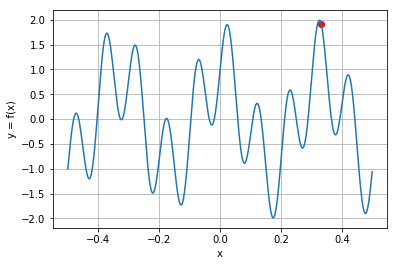

In [159]:
x_best, y_best = ILS(f, f_derivative, S=[-0.5, 0.5], step_size=0.001, t_max=100, iterations=20)

print("Maximum value of f(x*) =", y_best)
print("Optimal solution x* =", x_best)


# Plot a graph
step = 0.001
x = np.arange(-0.5, 0.5, step) 
y = f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid(True)
plt.scatter(x_best, y_best, color='red')

## Simulated annealding (SA)
- Set an initial temperature $T \leftarrow T_0$
- Find a starting point $\mathbf{x}_c \in S$ and evaluate $f(\mathbf{x}_c)$
- Repeat
 - Generate a new solution $\mathbf{x}_n$ and evaluate $f(\mathbf{x}_n)$
 - Calculate acceptance probability $P$
 - If $U(0,1) < P$
   - $\mathbf{x}_c \leftarrow \mathbf{x}_n$
 - Update temperature $T \leftarrow \alpha T$, $\alpha \in (0,1)$
- Return $\mathbf{x}_c$ as the solution

## Assignments: 
1. Implement a code that applies LS to maximize the following functions:
 - Sphere function
 - Ackley function
2. Implement simulated annealing (SA)


* Due: 5 Feb 2019, before 16:00
* Submit your code to ukrit.wa@kmitl.ac.th